# Predicting Airbnb Listing Prices in Sydney__

---

### Problem Description and Initial Data Analysis
  


In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)

# Importing training dataset
train = pd.read_csv('busa-2022s1/train.csv')
train.head(2)

,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,0,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,within a few hours,100%,69%,t,Balgowlah,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Balgowlah, New South Wales, Australia",Manly,-33.80084,151.26378,Entire residential home,Entire home/apt,6,3 baths,3.0,3.0,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",2,22,2.0,2.0,22.0,22.0,2.0,22.0,t,0,14,14,174.0,3,1,0,2016-01-02,2021-06-01,4.67,4.33,4.33,4.67,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.04,$470.00
1,1,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,Morag,2009-12-03,"Sydney, New South Wales, Australia",I am originally Scottish but I have made Sydne...,within an hour,100%,100%,f,Darlinghurst,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Darlinghurst, New South Wales, Australia",Sydney,-33.87964,151.21680,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,5,31,61,336.0,383,18,6,2012-02-23,2021-12-03,4.42,4.58,4.40,4.77,4.67,4.70,4.47,PID-STRA-24061-7,t,1,0,1,0,3.21,$82.00


In [3]:
# Importing testing dataset
test = pd.read_csv('busa-2022s1/test.csv')
test.head(2)

,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7000,Sweet dream come true*,Nordic style warm colour light to make you rel...,Located at Ryde near Meadowbank.13 mins for wa...,Vanessa,2016-07-05,"Ryde, New South Wales, Australia",NaN,NaN,NaN,NaN,t,NaN,1.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,"Ryde, New South Wales, Australia",Ryde,-33.81917,151.09689,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,30,0,0,2019-08-01,2019-12-10,4.87,4.87,4.73,4.97,4.93,4.8,4.93,NaN,t,1,0,1,0,1.05
1,7001,Huge self contained studio,It is a huge studio. Self contained which <br ...,NaN,J,2016-11-24,AU,NaN,NaN,NaN,NaN,f,NaN,1.0,['phone'],t,f,NaN,The Hills Shire,-33.74884,151.03992,Entire guest suite,Entire home/apt,2,1 bath,1.0,2.0,"[""Free street parking"", ""TV"", ""Hot water"", ""Lo...",90,1125,90.0,90.0,1125.0,1125.0,90.0,1125.0,t,0,0,0,0.0,1,0,0,2017-12-18,2017-12-18,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02


## **Forecasting Problem** 


Nowadays, there are no practical approaches for a new Airbnb host to set an optimum price to rent out their space. They often base their pricing decisions on the prices of other listings in the area. However, when it comes to pricing, several factors must be considered, as prices can vary greatly depending on the location of the property, amenities, the reliability of the hosts, and feedback from previous customers.
    
As a result, the purpose of this project is to analyse the nature of Airbnb listings in Sydney to better comprehend how various factors can be used to estimate the price of different properties. Moving further, an effective price prediction model using Machine Learning will be constructed to assist Airbnb hosts in setting an optimal price that is best suited in terms of host’s profitability, while remaining budget-friendly to customers. 


## **Evaluation Criteria** 

The dataset used in this project includes two subsets of data: Train and Test.     
Training data consists of **7000 entries** and **60 variables**, whereas test set contains **3000 observations** and **59 variables**. Target variable is **price**.    
The evaluation criteria are **Mean Squared Error (MSE)**, as stated in the problem overview. Our goal is to have the MSE as lowest as possible because low MSE is the key to a good prediction. 

## **Types of Variables/Features** 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            7000 non-null   int64  
 1   name                                          6999 non-null   object 
 2   description                                   6935 non-null   object 
 3   neighborhood_overview                         5183 non-null   object 
 4   host_name                                     7000 non-null   object 
 5   host_since                                    7000 non-null   object 
 6   host_location                                 6998 non-null   object 
 7   host_about                                    4542 non-null   object 
 8   host_response_time                            6355 non-null   object 
 9   host_response_rate                            6355 non-null   o

The dataset contains 34 numerical variables and 27 categorical variables.
The data type of features (categorical or numerical) will largely have an impact on our analysis since all input and output in Machine Learning must be numeric. As a result, before conducting any statistical analysis, we must convert the categorical variables to numbers.
Besides, our target 'price' is now seen as a categorical variable, which is also not in the right format.

In [5]:
# converting price to numerical data type
train['price'] = train['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

## **Data summary and main data characteristics**

A descriptive analysis was carried out in order to understand the relationship between a rental's price and the 60 variables in the dataset, and the variables were grouped into four primary categories:
1. Host: including host details such as identity, response rate, verification etc. 
2. Location : including neighborhood characteristics
2. Property: including type, amenities, number of rooms, availabily etc.  
3. Reviews: including number of reviews, review scores etc.  

### **Analysing continuous variables**

<AxesSubplot:xlabel='price', ylabel='Density'>

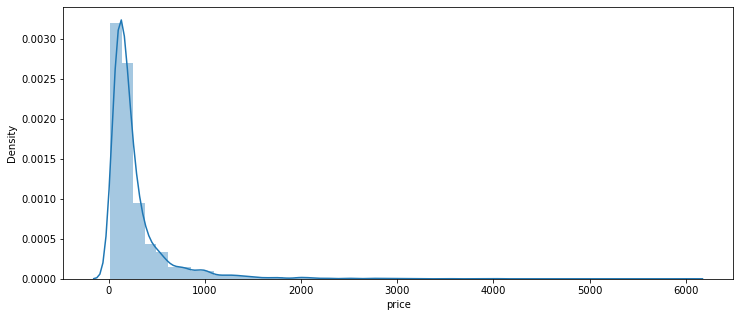

In [6]:
plt.figure(figsize=(12,5))
sns.distplot(train['price'], hist=True, label = 'price')

The price distribution is heavily right-skewed. Meaning that the huge percentage of property prices are somewhere between 0 and 2000, and a small percentage of properties have prices higher than that, causing the data to be skewed.

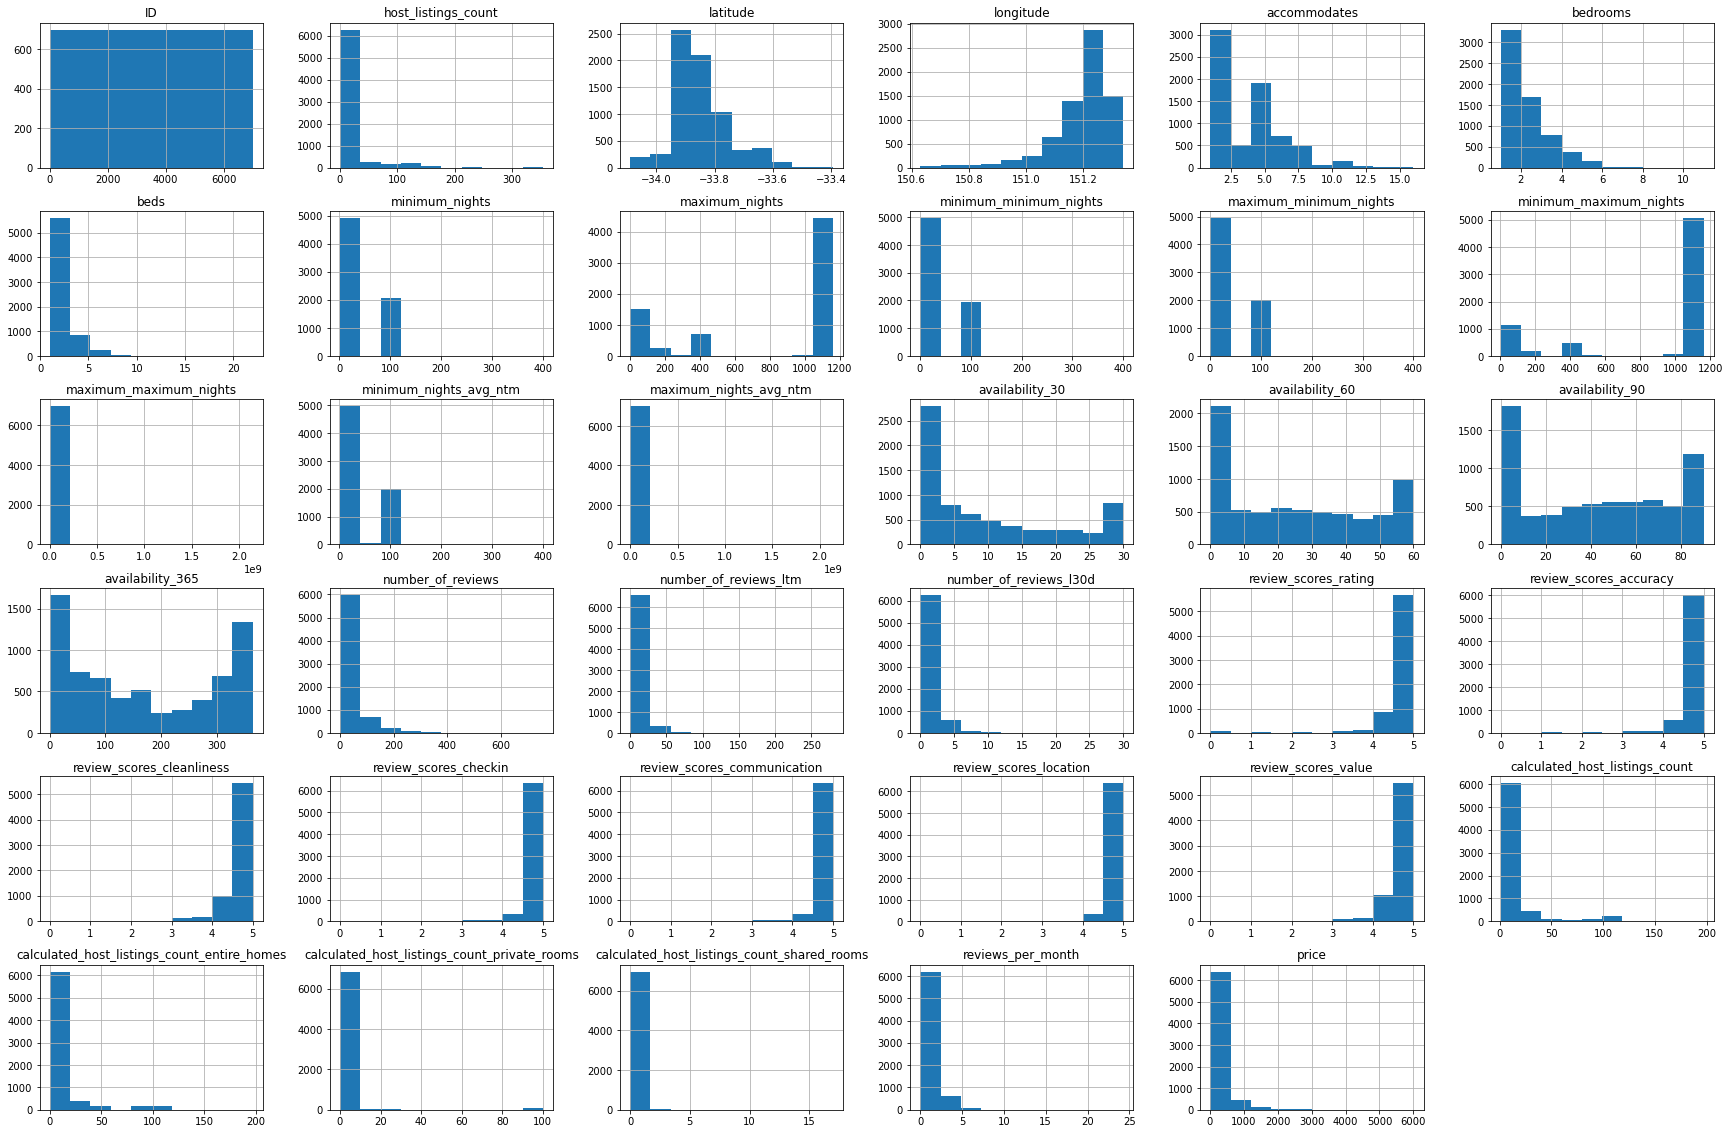

In [7]:
#Viewing distribution of numeric data
num_hist = train.hist(figsize=(30,20))

**Key findings:**
1. Latitude seems to be normally distributed, while longtitude is left-skewed
2. Except for availability-related columns, all other continuous variables have high percentage of outliers
3. The dataset is highly skewed as the skewness is seen across different variables. For a skewed data, the tail part may act as an outlier for the predictive models, as there are many models that are highly sensitive to outliers, particularly regression-based models. As a result, we need to transform/normalise the skewed data to be normally distributed before building predictive models.

### **Analysing categorical variables**

#### Host 

<AxesSubplot:xlabel='host_response_time', ylabel='price'>

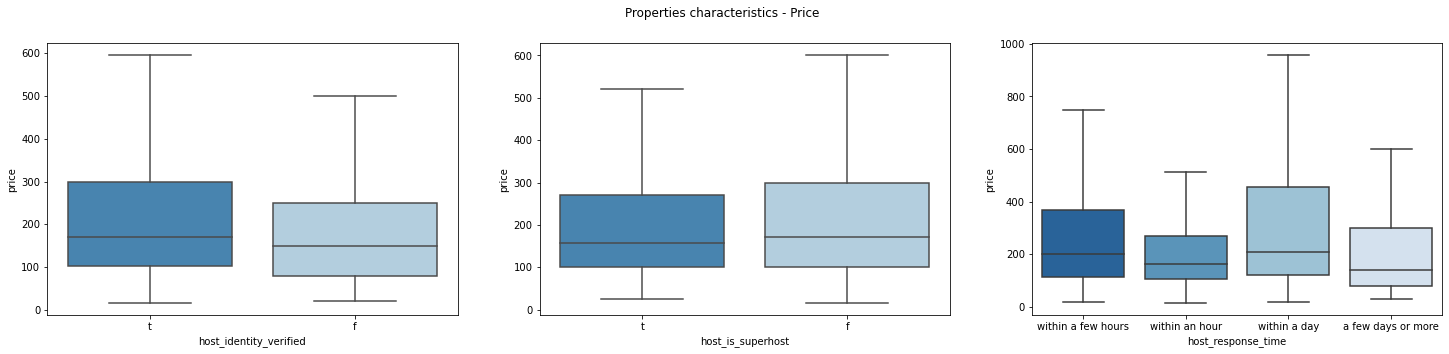

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
fig.suptitle('Properties characteristics - Price')
sns.boxplot(ax=axes[0], data=train, x='host_identity_verified', y='price', palette = "Blues_r",  showfliers = False) 
sns.boxplot(ax=axes[1], data=train, x='host_is_superhost', y='price', palette = "Blues_r", showfliers = False)
sns.boxplot(ax=axes[2], data=train, x='host_response_time', y='price', palette = "Blues_r", showfliers = False) 

**Key findings:**

1. Properties with hosts' identity verified often have higher price
2. Superhost feature does not seem to have impact on 'price'
3. Hosts who are responsive often often set higher price than unresponsive hosts 

#### Location

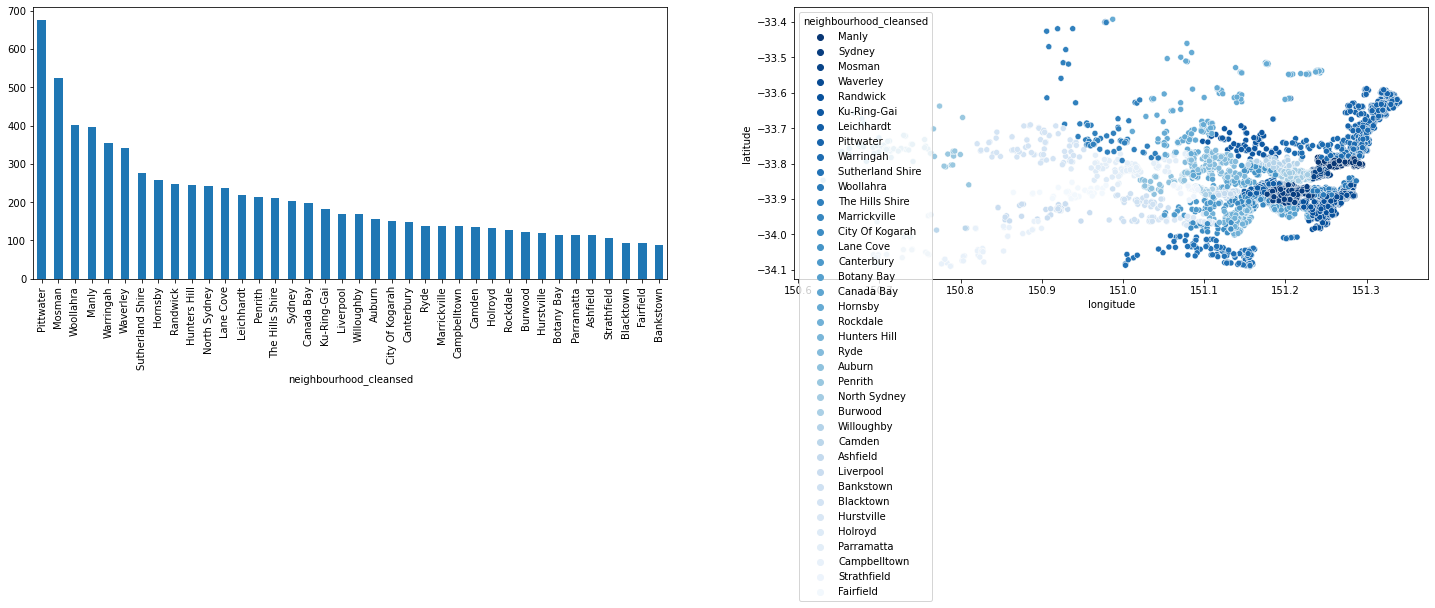

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
(train.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)).plot(ax=axes[0], kind="bar")
sns.scatterplot(train.longitude,train.latitude, hue=train.neighbourhood_cleansed,  palette = 'Blues_r')
plt.ioff()

**Key findings:**

It is noticed that Northern Beaches area such as Pittwater and Mosman have the highest Airbnb rental price, followed by suburbs that are close to the Central Business District. Western Sydney suburbs have the lowest rental price

#### Property

<AxesSubplot:xlabel='room_type', ylabel='price'>

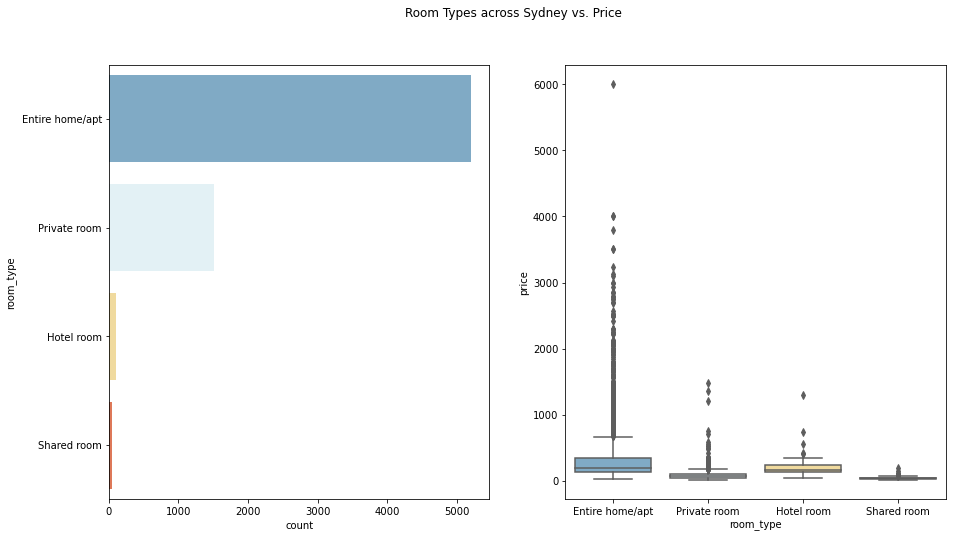

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Room Types across Sydney vs. Price')

sns.countplot(ax=axes[0], data=train, y='room_type', palette = "RdYlBu_r") #room type boxplot
sns.boxplot(ax=axes[1], data=train, x='room_type', y='price', palette = "RdYlBu_r") #room type boxplot


Text(0, 0.5, '$ Price')

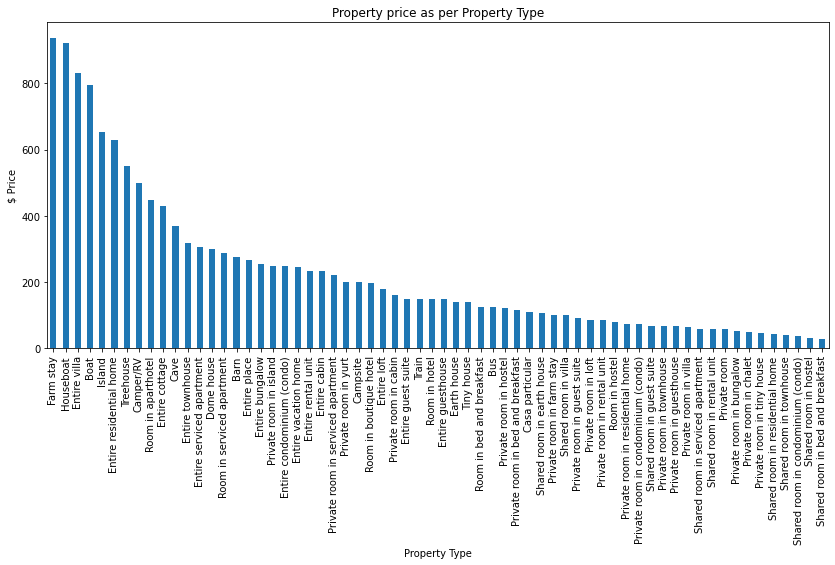

In [11]:
plt.figure(figsize=(14,6));
train.groupby(['property_type'])['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Property price as per Property Type')
plt.xlabel('Property Type')
plt.ylabel('$ Price')

<AxesSubplot:xlabel='accommodates', ylabel='price'>

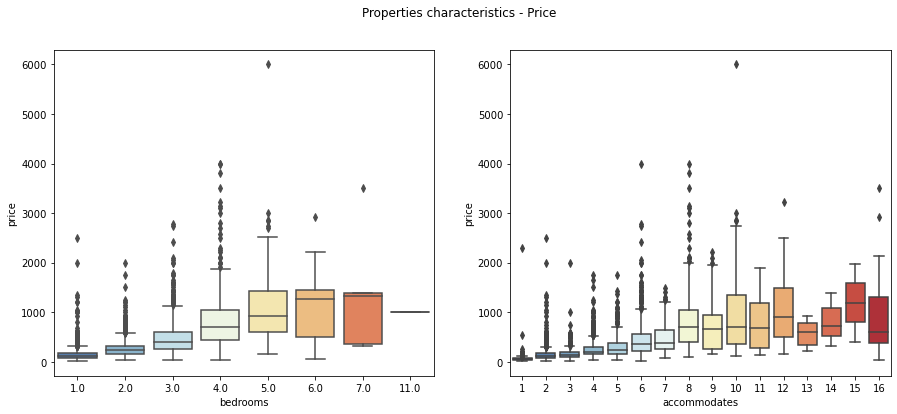

In [12]:
fig1, axes = plt.subplots(1, 2, figsize=(15, 6))
fig1.suptitle('Properties characteristics - Price')

sns.boxplot(ax=axes[0], data=train, x='bedrooms', y='price', palette = "RdYlBu_r") #number of bedrooms boxplot
sns.boxplot(ax=axes[1], data=train, x='accommodates', y='price', palette = "RdYlBu_r") #accomodates boxplot

**Key findings:**
1. Most of the room type for rent in Sydney is entire home/apartment, and their rental prices are also the most expensive. Private room and shared room are cheaper in general
2. Farmstay and Houseboat appear to be the most expensive properties to rent in Sydney, followed by Villa, Boat, Island and Entire residential home. The cheapest property types are private rooms and shared rooms
2. The rental price is proportional with the number of rooms in the property
3. As the accomodating size increases, the price increases,which is reasonable

#### **Missing Values**

In [13]:
# Calculate number of missing values in train dataset
train_missing_values = train.isna().sum().sort_values(ascending = False)
train_missing_percentage = (train_missing_values/train.isnull().count()*100).sort_values(ascending = False)


pd.concat([train_missing_values[train_missing_values > 0], train_missing_percentage[train_missing_percentage > 0]],
          axis=1, 
          keys=['Missing Values in Train dataset', 'Percent']).transpose()

,host_neighbourhood,host_about,license,neighborhood_overview,neighbourhood,host_acceptance_rate,bedrooms,host_response_time,host_response_rate,beds,review_scores_value,review_scores_accuracy,review_scores_location,review_scores_checkin,review_scores_cleanliness,review_scores_communication,room_type,review_scores_rating,last_review,first_review,reviews_per_month,neighbourhood_cleansed,property_type,description,availability_365,maximum_maximum_nights,minimum_minimum_nights,bathrooms,host_location,name
Missing Values in Train dataset,2912.0,2458.000000,1868.000000,1817.000000,1816.000000,745.000000,660.000000,645.000000,645.000000,240.000000,211.000000,210.0,210.0,209.000000,208.000000,208.000000,134.000000,114.000000,114.000000,114.000000,114.000000,108.000000,84.0,65.000000,47.000000,45.000000,45.000000,6.000000,2.000000,1.000000
Percent,41.6,35.114286,26.685714,25.957143,25.942857,10.642857,9.428571,9.214286,9.214286,3.428571,3.014286,3.0,3.0,2.985714,2.971429,2.971429,1.914286,1.628571,1.628571,1.628571,1.628571,1.542857,1.2,0.928571,0.671429,0.642857,0.642857,0.085714,0.028571,0.014286


In [14]:
test_missing_values = test.isna().sum().sort_values(ascending = False)
test_missing_percentage = (test_missing_values/test.isnull().count()*100).sort_values(ascending = False)
pd.concat([test_missing_values[test_missing_values > 0], test_missing_percentage[test_missing_percentage > 0]], 
          axis=1, 
          keys=['Missing Values in Test dataset', 'Percent']).transpose()

,host_response_time,host_response_rate,license,host_acceptance_rate,host_about,host_neighbourhood,neighbourhood,neighborhood_overview,review_scores_checkin,review_scores_value,review_scores_location,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,first_review,last_review,reviews_per_month,review_scores_rating,bedrooms,beds,description,neighbourhood_cleansed,room_type,property_type,availability_365,maximum_maximum_nights,minimum_minimum_nights,bathrooms,host_location,name
Missing Values in Test dataset,2534.000000,2534.000000,2393.000000,2285.000000,1432.000000,1263.0,1240.000000,1240.000000,643.000000,643.000000,642.0,641.000000,637.000000,636.0,466.000000,466.000000,466.000000,466.000000,178.000000,129.0,89.000000,42.0,41.000000,39.0,20.000000,10.000000,10.000000,4.000000,2.000000,1.000000
Percent,84.466667,84.466667,79.766667,76.166667,47.733333,42.1,41.333333,41.333333,21.433333,21.433333,21.4,21.366667,21.233333,21.2,15.533333,15.533333,15.533333,15.533333,5.933333,4.3,2.966667,1.4,1.366667,1.3,0.666667,0.333333,0.333333,0.133333,0.066667,0.033333


Both the train and test datasets contain missing values. The tables above show the number of missing values and the percentage of missing values in each column.

According to the missing values analysis, the majority of missing values are found in the host and review related columns. If there is very little information, some of these columns may need to be removed since they are unlikely to improve our forecasting

---

## Data Cleaning, Missing Observations and Feature Engineering


In [15]:
import pandas as pd

train1 = pd.read_csv('busa-2022s1/train.csv', index_col=0)
test1 = pd.read_csv('busa-2022s1/test.csv', index_col=0)

In [16]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = None

In [17]:
# clean target variable price
train1['price']=train1['price'].str[1:]
train1['price']=pd.to_numeric(train1['price'], errors='coerce', downcast="float")

In [18]:
# fill null values for price
train1.price.fillna(train1.price.mean(), inplace = True)

In [19]:
# merge train and test dataset to clean
data = pd.concat([train1.loc[:6999, train1.columns != 'price'], test1])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          9998 non-null   object 
 1   description                                   9846 non-null   object 
 2   neighborhood_overview                         6943 non-null   object 
 3   host_name                                     10000 non-null  object 
 4   host_since                                    10000 non-null  object 
 5   host_location                                 9996 non-null   object 
 6   host_about                                    6110 non-null   object 
 7   host_response_time                            6821 non-null   object 
 8   host_response_rate                            6821 non-null   object 
 9   host_acceptance_rate                          6970 non-null   

#### host_response_rate and host_acceptance_rate

Two variables host_response_rate and host_acceptance_rate contain both texts "%" and numbers. Therefore, the texts are eliminated. 

In [21]:
data[['host_response_rate', 'host_acceptance_rate']]

,host_response_rate,host_acceptance_rate
ID,,
0,100%,69%
1,100%,100%
2,100%,81%
3,100%,100%
4,100%,89%
...,...,...
9995,NaN,100%
9996,100%,45%
9997,NaN,100%


In [22]:
# eliminate the text 
data['host_response_rate']=data['host_response_rate'].str[:-1]
data['host_acceptance_rate']=data['host_acceptance_rate'].str[:-1]

In [23]:
# make the variables numerical
data['host_response_rate']=pd.to_numeric(data['host_response_rate'], errors='coerce', downcast="float")
data['host_acceptance_rate']=pd.to_numeric(data['host_acceptance_rate'], errors='coerce', downcast="float")

Create at least 4 new features from existing features which contain multiple items of information

In [24]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# count unique items in every row of host_veritifications

verti = np.array(data['host_verifications'])
count = CountVectorizer()
count.fit_transform(verti)

print(len(count.vocabulary_))
count.vocabulary_

19


{'email': 0,
 'phone': 10,
 'reviews': 11,
 'jumio': 5,
 'offline_government_id': 9,
 'government_id': 3,
 'facebook': 1,
 'selfie': 12,
 'identity_manual': 4,
 'work_email': 17,
 'manual_offline': 7,
 'sent_id': 13,
 'manual_online': 8,
 'google': 2,
 'kba': 6,
 'weibo': 16,
 'sesame': 14,
 'sesame_offline': 15,
 'zhima_selfie': 18}

In [26]:
# make new columns for new features based on host_veritification
data['host_veri_email'] = 0
data['host_veri_phone'] = 0
data['host_veri_reviews']= 0
data['host_veri_jumio'] = 0
data['host_veri_offline_government_id'] = 0
data['host_veri_government_id'] = 0
data['host_veri_facebook'] = 0
data['host_veri_selfie'] = 0
data['host_veri_identity_manual'] = 0
data['host_veri_work_email'] = 0
data['host_veri_manual_offline'] = 0
data['host_veri_sent_id'] = 0
data['host_veri_manual_online'] = 0
data['host_veri_google'] = 0
data['host_veri_kba'] = 0
data['host_veri_weibo'] = 0
data['host_veri_sesame'] = 0
data['host_veri_sesame_offline'] = 0
data['host_veri_zhima_selfie'] = 0

In [27]:
# assign 1 if the rows have the target words
data.loc[data['host_verifications'].str.contains('email'), 'host_veri_email'] = 1
data.loc[data['host_verifications'].str.contains('phone'), 'host_veri_phone'] = 1
data.loc[data['host_verifications'].str.contains('reviews'), 'host_veri_reviews'] = 1
data.loc[data['host_verifications'].str.contains('jumio'), 'host_veri_jumio'] = 1
data.loc[data['host_verifications'].str.contains('offline_government_id'), 'host_veri_offline_government_id'] = 1
data.loc[data['host_verifications'].str.contains('government_id'), 'host_veri_government_id'] = 1
data.loc[data['host_verifications'].str.contains('facebook'), 'host_veri_facebook'] = 1
data.loc[data['host_verifications'].str.contains('selfie'), 'host_veri_selfie'] = 1
data.loc[data['host_verifications'].str.contains('identity_manual'), 'host_veri_identity_manual'] = 1
data.loc[data['host_verifications'].str.contains('work_email'), 'host_veri_work_email'] = 1
data.loc[data['host_verifications'].str.contains('manual_offline'), 'host_veri_manual_offline'] = 1
data.loc[data['host_verifications'].str.contains('sent_id'), 'host_veri_sent_id'] = 1
data.loc[data['host_verifications'].str.contains('manual_online'), 'host_veri_manual_online'] = 1
data.loc[data['host_verifications'].str.contains('google'), 'host_veri_google'] = 1
data.loc[data['host_verifications'].str.contains('kba'), 'host_veri_kba'] = 1
data.loc[data['host_verifications'].str.contains('weibo'), 'host_veri_weibo'] = 1
data.loc[data['host_verifications'].str.contains('sesame'), 'host_veri_sesame'] = 1
data.loc[data['host_verifications'].str.contains('sesame_offline'), 'host_veri_sesame_offline'] = 1
data.loc[data['host_verifications'].str.contains('zhima_selfie'), 'host_veri_zhima_selfie'] = 1

In [28]:
del data['host_verifications']

Impute missing values for all features in both training and test datasets.   

In [29]:
# impute numerical variables with mean values
data['host_response_rate'].fillna(data['host_response_rate'].mean(), inplace = True)
data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].mean(), inplace = True)
data['minimum_minimum_nights'].fillna(data['minimum_minimum_nights'].mean(), inplace = True)
data['maximum_maximum_nights'].fillna(data['maximum_maximum_nights'].mean(), inplace = True)
data['availability_365'].fillna(data['availability_365'].mean(), inplace = True)
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace = True)
data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].mean(), inplace = True)
data['review_scores_cleanliness'].fillna(data['review_scores_cleanliness'].mean(), inplace = True)
data['review_scores_checkin'].fillna(data['review_scores_checkin'].mean(), inplace = True)
data['review_scores_communication'].fillna(data['review_scores_communication'].mean(), inplace = True)
data['review_scores_location'].fillna(data['review_scores_location'].mean(), inplace = True)
data['review_scores_value'].fillna(data['review_scores_value'].mean(), inplace = True)
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace = True)

In [30]:
# impute beds and bedrooms variables with mode values because these 2 features should have an integer value
data['bedrooms'].fillna(data['bedrooms'].mode()[0], inplace = True)
data['beds'].fillna(data['beds'].mode()[0], inplace = True)

Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode

#### property_type

Map the variable into 5 basic types and make the rest become "other"

In [31]:
data['top5-property-types'] = 'other'
data.loc[data['property_type'] == "Entire rental unit", 'top5-property-types'] = "Entire rental unit"
data.loc[data['property_type'] == "Entire residential home", 'top5-property-types'] = "Entire residential home"
data.loc[data['property_type'] == "Private room in residential home", 'top5-property-types'] = "Private room in residential home"
data.loc[data['property_type'] == "Private room in rental unit", 'top5-property-types'] = "Private room in rental unit"
data.loc[data['property_type'] == "Entire guest suite", 'top5-property-types'] = "Entire guest suite"

In [32]:
del data['property_type']

#### room_type

Fill null values in room_type with the most frequent value

In [33]:
data['room_type'].value_counts()

Entire home/apt    7063
Private room       2534
Hotel room          114
Shared room         114
Name: room_type, dtype: int64

In [34]:
data['room_type'].fillna("Entire home/apt", inplace = True)

#### Bathrooms

Impute null values based on description from variable "name"

In [35]:
data2 = data.copy()

In [36]:
data2.loc[data2['bathrooms'].isna(),['name','bathrooms']]

,name,bathrooms
ID,,
85,Curl Curl Beach Living,NaN
1103,Private Room in Potts Point,NaN
3289,Colourful Two Bedroom Apartment in Surry Hills,NaN
3387,The Challis Premium King Balcony Room,NaN
3487,Comfortable Three Bed Apartment in Olympic Park,NaN
5716,"Priv. room, 4 min. walk to Lidcombe Train station",NaN
7274,Cozy room in peaceful unit p,NaN
7476,main bedroom with private bathroom,NaN
8696,Amazing area and perfect room,NaN


In [37]:
# 10 data points without bathrooms informartion 
# impute based on description
data2.loc[data2.index[3487], "bathrooms"] = "2 private bathrooms"
data2.loc[data2.index[3289], "bathrooms"] = "2 private bathrooms"

In [38]:
data2.loc[data2['bathrooms'].isna(),['name','bathrooms']]

,name,bathrooms
ID,,
85,Curl Curl Beach Living,NaN
1103,Private Room in Potts Point,NaN
3387,The Challis Premium King Balcony Room,NaN
5716,"Priv. room, 4 min. walk to Lidcombe Train station",NaN
7274,Cozy room in peaceful unit p,NaN
7476,main bedroom with private bathroom,NaN
8696,Amazing area and perfect room,NaN
9891,Northern Beaches Retreat.,NaN


In [39]:
data2['bathrooms'].fillna("1 private bath", inplace = True)

Because bathrooms in this dataset have 2 types: private and shared, I make 2 new columns name private_bathrooms and shared_bathrooms, then fill the number of bathrooms on each types if exist.
    

In [40]:
data2['bathrooms'].value_counts()

1 bath                 5007
2 baths                1470
1 shared bath          1051
1 private bath          704
1.5 baths               448
3 baths                 326
2.5 baths               304
2 shared baths          170
1.5 shared baths        169
3.5 baths                83
4 baths                  75
3 shared baths           39
2.5 shared baths         29
0 baths                  17
5 baths                  17
0 shared baths           17
4.5 baths                16
3.5 shared baths          9
Shared half-bath          9
Half-bath                 8
4 shared baths            5
6 shared baths            5
5.5 baths                 4
6 baths                   4
4.5 shared baths          3
5.5 shared baths          2
Private half-bath         2
2 private bathrooms       2
7 shared baths            2
6.5 baths                 1
11 baths                  1
19 baths                  1
Name: bathrooms, dtype: int64

In [41]:
# extract number from text 
data2['no_baths']=data2['bathrooms'].str.extract('(\d+)')

In [42]:
# Half-bath returns no number for column no_baths
data2.loc[data2['no_baths'].isna(),['bathrooms']]

,bathrooms
ID,
92,Shared half-bath
927,Shared half-bath
1021,Private half-bath
1714,Shared half-bath
1862,Shared half-bath
1864,Shared half-bath
2388,Half-bath
3117,Half-bath
5334,Shared half-bath


In [43]:
con0= data2['bathrooms'].str.contains('half-bath|Half-bath')
data2.loc[con0, 'no_baths']=0.5
data2['no_baths'] = data2['no_baths'].astype(float)

In [44]:
cond1 = data2['bathrooms'].str.contains('private|Private')

data2.loc[cond1,'private_bathrooms'] = data2.loc[cond1,'no_baths']

data2['private_bathrooms'] = np.where(data2['private_bathrooms'].isna(),0,data2['private_bathrooms'])

In [45]:
cond2 = data2['bathrooms'].str.contains('shared|Shared')

data2.loc[cond2,'shared_bathrooms'] = data2.loc[cond2,'no_baths']

data2['shared_bathrooms'] = np.where(data2['shared_bathrooms'].isna(),0,data2['shared_bathrooms'])

For cells that don't mention bathroom types, I fill the information by comparing it with the number of bedrooms from the bedrooms column. If the number of bedrooms is equal or less than that of bathrooms, the type is private. Otherwise, the bathroom type is shared. 

In [46]:
con3 = (data2['shared_bathrooms']==0) & (data2['private_bathrooms']==0) & (data2['bedrooms']>data2['no_baths'])
data2.loc[con3,'shared_bathrooms'] = data2.loc[con3,'no_baths']

In [47]:
con4 = (data2['shared_bathrooms']==0) & (data2['private_bathrooms']==0) & ((data2['bedrooms']<data2['no_baths'])|(data2['bedrooms']==data2['no_baths']))
data2.loc[con4, 'private_bathrooms']= data2.loc[con4,'no_baths']

In [48]:
# check if every bathroom is counted
data2['private_bathrooms'] = data2['private_bathrooms'].astype(float)
data2['shared_bathrooms'] = data2['shared_bathrooms'].astype(float)
print(sum(data2['private_bathrooms']))
print(sum(data2['shared_bathrooms']))
print(sum(data2['no_baths']))

6600.0
6724.5
13324.5


In [49]:
del data2['no_baths']

In [50]:
del data2['bathrooms']

#### host_response_time

In [51]:
#impute missing values with most frequent appearance
data2.host_response_time.value_counts()

within an hour        4099
within a few hours    1386
within a day           956
a few days or more     380
Name: host_response_time, dtype: int64

In [52]:
data2.host_response_time = data2.host_response_time.fillna("within an hour")

In [53]:
data2.loc[data2.host_response_time == "within an hour",'host_response_time'] = 0
data2.loc[data2.host_response_time == "within a few hours",'host_response_time'] = 1
data2.loc[data2.host_response_time == "within a day",'host_response_time'] = 2
data2.loc[data2.host_response_time == "a few days or more",'host_response_time'] = 3

#### Neighbourhood_cleansed

Impute null values based on longitude and latitude

In [54]:
data3=data2.copy()

In [55]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [56]:
from geopy.geocoders import Nominatim
def get_address_by_location_update(latitude, longitude):

    geolocator = Nominatim(user_agent="tutorial")
    coordinates = f"{latitude}, {longitude}"
    location = geolocator.reverse(coordinates)
    loc_object = location.raw
    try:
        municipality = loc_object['address']['municipality']
        return municipality
        # address = loc_object['address']
    except:
        county = loc_object['address']['county']
    return county

In [57]:
# exclude null values in neighbourhood_cleansed
data3a = data3[~data3['neighbourhood_cleansed'].isna()]
data3a.shape

(9850, 78)

In [58]:
# include all null val in neighbourhood_cleansed
data3b = data3.loc[data3['neighbourhood_cleansed'].isna()]
display(data3b.shape)


(150, 78)

In [59]:
data3b['neighbourhood_cleansed'] = data3b.apply(lambda x: get_address_by_location_update(x['latitude'], x['longitude']), axis = 1 )

In [60]:
data4 = pd.concat([data3a, data3b], axis=0)

In [61]:
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.lower()

In [62]:
# Standardize neighbourhood name
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace(" city council", "" )
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace(" municipal council", "" )
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace(" council", "" )
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace("council of the city of ", "" )
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace("the of the shire of ", "" )
data4['neighbourhood_cleansed'] = data4['neighbourhood_cleansed'].str.replace("city of ", "" )

In [63]:
data4.loc[data4['neighbourhood_cleansed'] == "bankstown", 'neighbourhood_cleansed'] = "canterbury-bankstown"
data4.loc[data4['neighbourhood_cleansed'] == "canterbury", 'neighbourhood_cleansed'] = "canterbury-bankstown"

In [64]:
data4 = data4.sort_values(by = "ID")

#### host_since

In [65]:
# Extract year from 'host_since'
data4['host_since'] = pd.DatetimeIndex(data4['host_since']).year

#### Dropping columns because of high percentage of missing value or unnecessity

In [66]:
del data4["license"]
del data4["host_neighbourhood"]
del data4["neighbourhood"]
del data4["host_name"]
del data4["first_review"]
del data4["last_review"]
del data4["name"]

#### Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ('host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable',
 'top5-property-types')

for column in categorical_cols:
    label = LabelEncoder() 
    label.fit(list(data4[column].values)) 
    data4[column] = label.transform(list(data4[column].values))


#### Host_location

Fill null values with the most common location. From this column, I make a new column to see if the host is based in Australia or not since we are predicting airbnb price in Sydney.

In [68]:
data4.host_location = data4.host_location.fillna("Sydney, New South Wales, Australia")

In [69]:
con9 = data4['host_location'].str.contains("Australia|AU|australia|au")
data4['host_in_AU'] = 0
data4.loc[con9, 'host_in_AU'] = 1

In [70]:
del data4['host_location']

#### host_about (If there is host_about: 1, no host_about: 0)

In [71]:
#fill missing value with 'unknown'
data4['host_about'] = data4['host_about'].fillna('unknown')
data4['host_about'] = data4['host_about'].apply(lambda x : 0 if x in  ('unknown') else 1)

#### neighborhood_overview (If there is neighborhood_overview: 1, no neighborhood_overview: 0)

In [72]:
#fill missing value with 'unknown'
data4['neighborhood_overview'] = data4['neighborhood_overview'].fillna('unknown')
data4['neighborhood_overview'] = data4['neighborhood_overview'].apply(lambda x : 0 if x in  ('unknown') else 1)

#### description (If there is  description: 1, no description: 0)

In [73]:
#fill missing value with 'unknown'
data4['description'] = data4['description'].fillna('unknown')
# if description is unknown, impute 0, 1 otherwise 
data4['description'] = data4['description'].apply(lambda x : 0 if x in  ('unknown') else 1)

#### Amenities

Since amenities is important in predicting price, I count the number of amenities provided from each airbnb

In [74]:
data5 = data4.copy()

In [75]:
amenities_col = []
amenities_map = {}
for s in data5.amenities:
  s = s.replace('{','')
  s = s.replace('}','')
  s = s.replace('"','')
  s = s.split(',')
  amenities_col.append(max(len(s)-1,0))
  for k in s:
    if amenities_map.get(k) != None:
      amenities_map[k] +=1 
    else:
      amenities_map[k] = 1

In [76]:
data5['amenities_count'] = pd.Series(amenities_col)

In [77]:
del data5['amenities']

Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 


#### Correlation among variables

In [78]:
data5.corr()

,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_veri_email,host_veri_phone,host_veri_reviews,host_veri_jumio,host_veri_offline_government_id,host_veri_government_id,host_veri_facebook,host_veri_selfie,host_veri_identity_manual,host_veri_work_email,host_veri_manual_offline,host_veri_sent_id,host_veri_manual_online,host_veri_google,host_veri_kba,host_veri_weibo,host_veri_sesame,host_veri_sesame_offline,host_veri_zhima_selfie,top5-property-types,private_bathrooms,shared_bathrooms,host_in_AU,amenities_count
description,1.000000,0.181425,-0.070792,0.061790,-0.038465,0.103926,0.029750,0.052122,0.023631,0.018674,0.057045,0.034916,0.025867,0.065288,-0.117245,0.066588,0.047087,0.050091,-0.121059,-0.051364,-0.123204,-0.121315,-0.042565,0.004146,-0.122435,0.004141,-0.000903,-0.026825,-0.007973,0.001885,0.037985,0.058019,0.052660,0.049347,0.112514,0.063141,0.077091,0.052047,0.069583,0.058597,0.051570,-0.016505,0.036539,0.037692,0.004659,-0.019866,0.063123,0.061524,-0.006134,0.099170,0.048578,-0.013710,0.013648,-0.002342,-0.027309,-0.031172,0.042341,0.018450,0.001769,0.018002,0.015263,0.004683,0.003754,0.002502,0.002502,-0.009143,-0.063104,0.009026,0.009385,0.045775,0.103855
neighborhood_overview,0.181425,1.000000,-0.086130,0.197159,-0.014709,0.092924,0.067370,0.133067,0.070081,0.047215,0.082061,0.058522,0.027746,0.080494,-0.108498,0.063704,0.045309,0.058791,-0.153969,-0.095941,-0.156758,-0.153872,-0.055593,0.015499,-0.157250,0.015788,0.016275,-0.021665,0.003975,0.020275,0.085807,0.177706,0.128768,0.094595,0.139075,0.080570,0.089720,0.069069,0.077058,0.076725,0.072594,-0.022975,0.080598,0.061698,0.059324,-0.018591,0.140292,0.062135,0.002942,0.082596,0.089198,0.034049,0.050298,-0.006490,-0.000373,-0.009973,0.083015,0.033246,-0.005965,0.052419,0.022739,0.013235,-0.023516,0.013274,0.013274,-0.036585,-0.024967,0.001011,0.009273,0.061299,0.282347
host_since,-0.070792,-0.086130,1.000000,-0.270582,-0.092247,-0.010229,0.162704,-0.034298,0.030100,-0.064599,-0.084525,-0.174636,-0.000180,-0.241503,0.099391,-0.047698,-0.087764,-0.033249,-0.078544,-0.037619,-0.089900,-0.087444,-0.014068,0.036843,-0.087949,0.037182,0.040018,0.155542,0.181502,0.189065,0.077224,-0.116186,0.110388,0.103483,-0.065023,-0.107443,-0.067296,-0.096132,-0.114635,-0.084426,-0.067286,0.248687,0.018752,-0.048459,0.155724,0.065646,0.122095,-0.224602,-0.005288,-0.689641,-0.330217,0.141101,-0.134856,-0.222024,0.158969,0.171190,-0.089847,-0.156362,-0.012958,-0.120213,-0.023519,-0.046558,-0.012912,0.002504,0.002504,0.034608,0.118908,0.027530,-0.055078,0.020659,-0.005023
host_about,0.061790,0.197159,-0.270582,1.000000,-0.021519,0.093948,0.013880,0.110233,0.207468,0.060735,0.147456,0.080896,-0.001715,0.070698,-0.091413,0.067181,0.054641,0.044252,-0.129936,-0.072196,-0.130601,-0.121579,-0.053631,0.014077,-0.126410,0.014657,0.015589,-0.000967,0.010735,0.022647,0.086292,0.125680,0.041978,0.018001,0.090826,0.053197,0.064029,0.031099,0.045663,0.065253,0.035326,-0.031425,0.223871,0.211590,0.074434,-0.052477,0.072256,0.172745,0.023743,0.209260,0.199367,0.015014,0.091667,-0.004402,-0.037225,-0.038855,0.175

In [79]:
cl_train = data5.loc[:6999,]

In [80]:
cl_train['price'] = train1['price']

<AxesSubplot:>

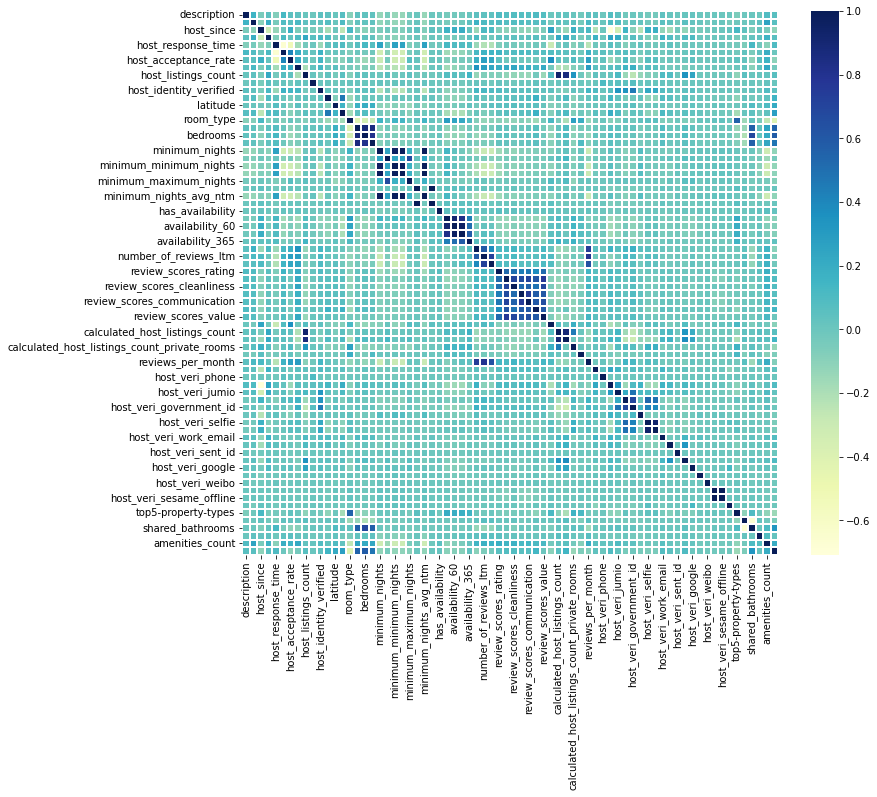

In [81]:
corrmat = cl_train.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Overall, there is little or no correlation among most variables. However, there are still some moderately strong correlation. Review_score variables about rating, cleanliness, communication, values are moderately correlated. Bedrooms, beds and accommodates are strongly correlated. 

#### Price vs other variables

<AxesSubplot:>

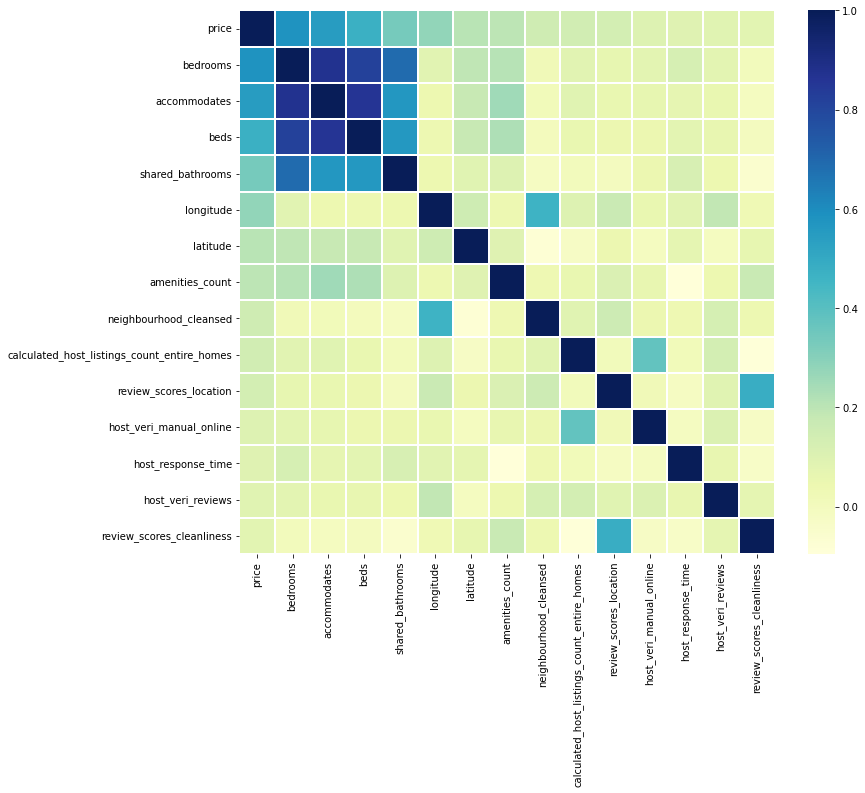

In [82]:
k = 15 
  
cols = corrmat.nlargest(k, 'price')['price'].index
  
cm = np.corrcoef(cl_train[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values)

The heatmap shows top 15 variables that have the highest correlation with price. Bedrooms, accommodates and beds are more correlated with price than other variables. 

--- 
Fit and tune a forecasting model

1. Build a machine learning (ML) regression model taking into account the outcomes 
2. Fit the model and tune hyperparameters via cross-validation
3. Create predictions using the test dataset

###  A first glance at the dataset

In [83]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('ignore')

Initially, we use some code fragments to import numpy, pandas..., which are the fumdamental libraries to operate the remaining program


In [88]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)

df = data5.copy()
train_df = pd.read_csv('busa-2022s1/train.csv')
df.head()

,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_veri_email,host_veri_phone,host_veri_reviews,host_veri_jumio,host_veri_offline_government_id,host_veri_government_id,host_veri_facebook,host_veri_selfie,host_veri_identity_manual,host_veri_work_email,host_veri_manual_offline,host_veri_sent_id,host_veri_manual_online,host_veri_google,host_veri_kba,host_veri_weibo,host_veri_sesame,host_veri_sesame_offline,host_veri_zhima_selfie,top5-property-types,private_bathrooms,shared_bathrooms,host_in_AU,amenities_count
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,2009,1,1,100.0,69.0,1,2.0,1,1,23,-33.80084,151.26378,0,6,3.0,3.0,2,22,2.0,2.0,22.0,22.0,2.0,22.0,1,0,14,14,174.0,3,1,0,4.67,4.33,4.33,4.67,4.33,4.67,4.33,0,2,2,0,0,0.04,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.0,0.0,1,28
1,1,1,2009,1,0,100.0,100.0,0,3.0,1,1,36,-33.87964,151.21680,2,2,1.0,1.0,2,90,2.0,2.0,90.0,90.0,2.0,90.0,1,5,31,61,336.0,383,18,6,4.42,4.58,4.40,4.77,4.67,4.70,4.47,1,1,0,1,0,3.21,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,3,1.0,0.0,1,39
2,1,1,2010,1,1,100.0,81.0,1,1.0,1,1,25,-33.81748,151.23484,0,4,1.0,1.0,2,90,2.0,2.0,90.0,90.0,2.0,90.0,1,1,9,33,217.0,297,15,4,4.55,4.66,4.23,4.87,4.90,4.73,4.68,0,1,1,0,0,2.23,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1,30
3,1,1,2010,1,2,100.0,100.0,1,1.0,1,1,39,-33.88905,151.27653,0,4,2.0,2.0,90,90,90.0,90.0,90.0,90.0,90.0,90.0,1,12,42,72,347.0,33,1,0,4.42,4.42,3.74,4.90,4.90,4.90,4.32,0,1,1,0,0,0.25,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1,31
4,1,0,2011,1,0,100.0,89.0,1,2.0,1,1,14,-33.72966,151.05226,2,4,2.0,3.0,1,30,1.0,1.0,30.0,30.0,1.0,30.0,1,26,53,83,358.0,61,15,0,4.95,4.93,4.98,4.98,5.00,4.79,4.93,0,1,0,1,0,0.48,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0.0,2.0,1,53


Then we import 2 csv files ' df_clean.csv' and 'train.csv' via function pd.read_csv, and initiate names for them as df and train_df respectively.

In [89]:
train = df.loc[0:6999,:]# Create train dataset
test = df.loc[7000:] # Create test dataset

Now, using loc function,  we retrieve the values of the first 7000 rows and assign them to a name' train'. Likewise, the remaining 3000 values is put in 'test'.


In [90]:
train['price'] = train_df['price'] #  Add one new column 'price' to train dataset just created.This 'price column 

Then we add one new column 'price' to train dataset just created. We assign the value for this 'price' column the same as the one obtained in the train.csv file{'train_df['price']), and make sure that the value match with house ID row by row. 

In [91]:
# converting price to numerical data type
train['price'] = train['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [92]:
train.columns # print all the columns name in train dataset

Index(['description', 'neighborhood_overview', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',


In [107]:
feature_cols = np.array(['description', 'neighborhood_overview', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_veri_email', 'host_veri_phone', 'host_veri_reviews',
       'host_veri_jumio', 'host_veri_offline_government_id',
       'host_veri_government_id', 'host_veri_facebook', 'host_veri_selfie',
       'host_veri_identity_manual', 'host_veri_work_email',
       'host_veri_manual_offline', 'host_veri_sent_id',
       'host_veri_manual_online', 'host_veri_google', 'host_veri_kba',
       'host_veri_weibo', 'host_veri_sesame', 'host_veri_sesame_offline',
       'host_veri_zhima_selfie', 'top5-property-types', 'private_bathrooms',
       'shared_bathrooms', 'host_in_AU', 'amenities_count'])

In [108]:
X_train = train[feature_cols]
y_train = train['price']

X_test = test[feature_cols]

We then create an array entailing all the variables except for 'ID' and 'price' columns and only these variables will be considered in X_train and X_test. Meanwhile, we retrieve the 'price' column from train ( train['price']) and assign it to y_train.

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   description                                   7000 non-null   int64  
 1   neighborhood_overview                         7000 non-null   int64  
 2   host_since                                    7000 non-null   int64  
 3   host_about                                    7000 non-null   int64  
 4   host_response_time                            7000 non-null   int64  
 5   host_response_rate                            7000 non-null   float32
 6   host_acceptance_rate                          7000 non-null   float32
 7   host_is_superhost                             7000 non-null   int32  
 8   host_listings_count                           7000 non-null   float64
 9   host_has_profile_pic                          7000 non-null   i

###  Feature Scaling

In [110]:
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Since the predictors are measured in different scales, we decide to use StandardScaler function to bring all the feautures in the same range bewteen 0 and 1. We just need only to fit on the X_train dataset and then transform or perform feature scaling on both X_train and X_test.


###  Machine Learning and model comparison

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

models = {
    LogisticRegression(): "Logistic Regression",
    Lasso(): "Lasso",
    Ridge(): "Ridge",
    ElasticNet(): "ElasticNet",
    RandomForestRegressor(): "Random Forest"
}

for model in models.keys():
    model.fit(X_train_scaled, y_train)

Now we are going to use 5 different ML algorithms including LogisticRegression,Lasso, Ridge,ElasticNet and RandomForestRegressor to predict the price. We will first apply these model in the train dataset first and comparing the perfomances between algorithms. Accuracy score and MSE will be the metrics to evaluate the performance. 

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Tesing model and calculaing the score of each model
for model, model_name in models.items():
    print(model_name + " accuracy score"  + ": {:.3f}".format(model.score(X_train_scaled, y_train)))


for model, model_name in models.items():
    y_predict= model.predict(X_train_scaled)
    MSE = mean_squared_error(y_train, y_predict)
    print(f'Mean Squared Error of {model_name} = {MSE:.3f}')   

Logistic Regression accuracy score: 0.324
Lasso accuracy score: 0.557
Ridge accuracy score: 0.559
ElasticNet accuracy score: 0.517
Random Forest accuracy score: 0.955
Mean Squared Error of Logistic Regression = 18529.531
Mean Squared Error of Lasso = 50892.647
Mean Squared Error of Ridge = 50649.013
Mean Squared Error of ElasticNet = 55410.447
Mean Squared Error of Random Forest = 5211.880


In [114]:
# Tesing model and calculaing the score of each model
for model, model_name in models.items():
    print(model_name + " accuracy score"  + ": {:.3f}".format(model.score(X_train_scaled, y_train)))

Logistic Regression accuracy score: 0.324
Lasso accuracy score: 0.557
Ridge accuracy score: 0.559
ElasticNet accuracy score: 0.517
Random Forest accuracy score: 0.955


In [115]:
for model, model_name in models.items():
    y_predict= model.predict(X_train_scaled)
    MSE = mean_squared_error(y_train, y_predict)
    print(f'Mean Squared Error of {model_name} = {MSE:.3f}')

Mean Squared Error of Logistic Regression = 18529.531
Mean Squared Error of Lasso = 50892.647
Mean Squared Error of Ridge = 50649.013
Mean Squared Error of ElasticNet = 55410.447
Mean Squared Error of Random Forest = 5211.880


By cross-checking the mertrics bewteen these 5 algorithms, Random Forest seems to the highest accuracy score and lowest MSE. Therefore, we proceed with Random Forest to make predictions of house price. Now we are going to tune parameters and work out the best parameters to apply in this algorithm.


###  Fine- tune random forest

In [116]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state = 0)
param_grid = [
{'n_estimators': [10, 25], 'max_features': [0, 40], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train_scaled, y_train)

# grid_best= grid_search_forest.best_estimator_.predict(X_train_scaled)
# grid_mse = mean_squared_error(y_train, grid_best)
# grid_mse

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [0, 40],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

We will use GridSearch to tune different hyperparameters. Below are the hyperparameter used by us and their definition: 

Most important hyperparameters of Random Forest:
n_estimators = number of trees
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

Then we also consider appropriate range of values for each hyperparameter. After that, we run GridSearch and fit it in train dataset.


In [117]:
grid_search_forest.best_params_ #  obtain the best parameters from Gridsearch

{'bootstrap': True, 'max_depth': 10, 'max_features': 40, 'n_estimators': 25}

### Feature selection

In [118]:
from sklearn.feature_selection import RFE

In [119]:
# extract the numerical values of feature importance from the grid search
importances = grid_search_forest.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df1 = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df1['importance'])
feature= list(df1['feature'])
print(df1)


      importance                                       feature
0   3.004221e-01                                      bedrooms
1   1.401151e-01                                  accommodates
2   1.249733e-01                                     longitude
3   3.237888e-02                                      latitude
4   3.086119e-02                              shared_bathrooms
5   3.013097e-02                             private_bathrooms
6   2.767663e-02                                          beds
7   2.419022e-02                           host_listings_count
8   2.393439e-02                              availability_365
9   2.155034e-02                               availability_30
10  1.421845e-02                               availability_60
11  1.377193e-02   calculated_host_listings_count_entire_homes
12  1.351422e-02                                    host_since
13  1.303160e-02                calculated_host_listings_count
14  1.054830e-02                               availabi

Text(0.5, 1.0, 'Variable Importances')

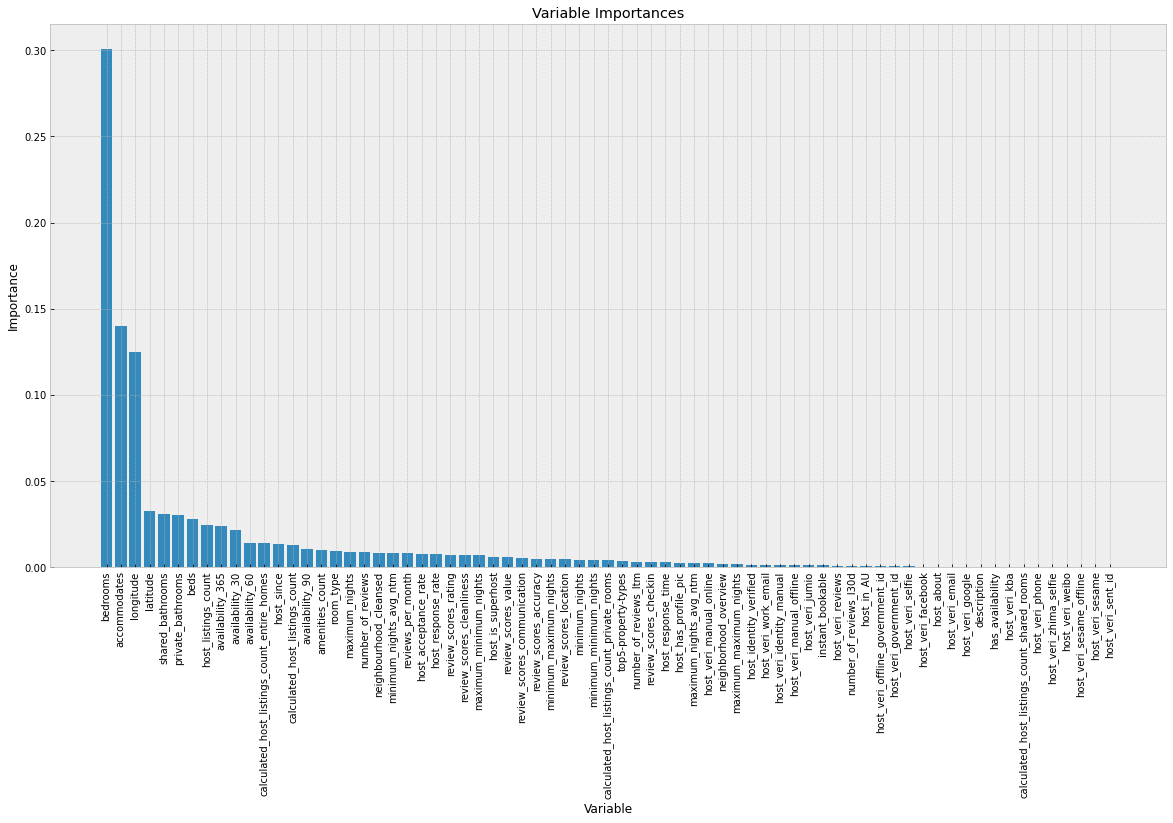

In [120]:
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(20,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [121]:
# feature extraction
estimator = RandomForestRegressor(random_state = 1,
                                 bootstrap = True, 
                                 max_depth = 50, 
                                 max_features = 40, 
                                 n_estimators = 100)
selector = RFE(estimator, 40)  # select 40 features for us
selector = selector.fit(X_train_scaled, y_train)

supp = selector.get_support()
print("Selected features:", feature_cols[supp])
# test the model
predicted = selector.predict(X_train_scaled)
print("MSE:", mean_squared_error(y_train, predicted))

Selected features: ['host_since' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_listings_count'
 'host_has_profile_pic' 'neighbourhood_cleansed' 'latitude' 'longitude'
 'room_type' 'accommodates' 'bedrooms' 'beds' 'minimum_nights'
 'maximum_nights' 'minimum_minimum_nights' 'maximum_minimum_nights'
 'minimum_maximum_nights' 'minimum_nights_avg_ntm'
 'maximum_nights_avg_ntm' 'availability_30' 'availability_60'
 'availability_90' 'availability_365' 'number_of_reviews'
 'review_scores_rating' 'review_scores_accuracy'
 'review_scores_cleanliness' 'review_scores_checkin'
 'review_scores_communication' 'review_scores_location'
 'review_scores_value' 'calculated_host_listings_count'
 'calculated_host_listings_count_entire_homes' 'reviews_per_month'
 'top5-property-types' 'private_bathrooms' 'shared_bathrooms'
 'amenities_count']
MSE: 5241.832792885714


Among all predictors chosen, we believe that there may be some features making insignificant contribution to the model. As such, we decide to use the importance_features function and analyse the importamce score of those features. Then we decide RFE library to extract only the most 40 necessary features.

In [122]:
# Get the predicted price for Test dataset
rfe_test = selector.predict(X_test_scaled)
rfe_test

array([ 45.79, 163.12, 139.5 , ..., 251.67, 226.8 , 205.97])

In [127]:
datatest=pd.DataFrame()
datatest['ID'] = test.index
datatest['price'] = rfe_test
datatest.to_csv("winnerchickendinner.csv", index=False)

Finally, Using to_csv function, we create a new csv file include one ID column and the other named 'price'. We initialise the values in array rfe_test to this column. 